# Part II - (Presentation for the Ford GoBike System)
## by (Dada Olujare)

## Investigation Overview


> The goal of this presentation is to present the key findings from the exploration of the Ford GoBike System Dataset.

### Quick Summary
- The length of time for which a biking activity can go depends on the type of User and also the Gender of the rider.

- The timing and amount of Biking activity depends on the day of the week.

- The most busy station: San Francisco Caltrain Station 2 

- The most busy route: Berry St. at 4th St. to San Francisco Ferry Building (Harry Bridges Plaza)


## Dataset Overview

> The dataset given contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
sb.set()

In [2]:
# load in the dataset into a pandas dataframe
new_data = pd.read_csv("cleaned_dataset.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> The length of time for which a biking activity can go depends on the type of User and also the Gender of the rider
While typical bike ride took about 508 seconds, Customers spent more time riding than Subscribers and Females spent more time riding than Males.

In [3]:
def make_duration_histogram(demographic_df, color, xlabel, ylabel, title, legend, x,y):
    """This function helps us make histograms for the Duration in seconds against a particular demographic.
    
    It takes in some arguments:
    1. demographic_df: This is the dataframe containing the demographic whose bikiing duration we want to see displayed.
    2. color: This gives the color of the histogram.
    3. xlabel: This is simply the duration values from the duration_sec column.
    4. ylabel: This is the frequency of occurrence or the Number of rides per duration.
    5. title: This is the title of the entire diagram.
    6. legend: This gives the legend of the entire histogram.
    
    """
    sea_plot = sb.histplot(data = demographic_df, x = "duration_sec", kde = "True", color =color)
    sea_plot.set_xlim(0, 3000)
    plt.axvline(demographic_df["duration_sec"].median(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    #plt.axvline(demographic_df["duration_sec"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.text(demographic_df["duration_sec"].median()*x, max_ylim*y, 'Median: {:.2f}'.format(demographic_df["duration_sec"].median()))
    #plt.text(demographic_df["duration_sec"].mean()*1.02, max_ylim*0.7, 'Mean: {:.2f}'.format(demographic_df["duration_sec"].mean()))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend([legend]);
    


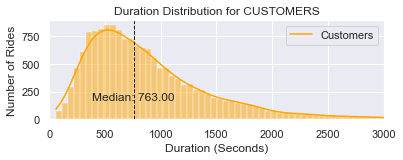

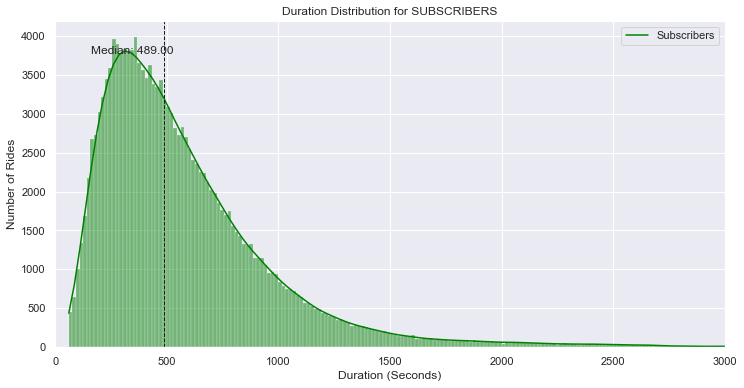

In [4]:
normal = new_data[new_data["duration_sec"] <=new_data["duration_sec"].quantile(0.995)]

customer_normal = normal[normal["user_type"] == "Customer"]
subscriber_normal = normal[normal["user_type"] == "Subscriber"]

plt.subplot(211)
make_duration_histogram(customer_normal, color = "orange", xlabel = "Duration (Seconds)", ylabel = "Number of Rides",
                       title = "Duration Distribution for CUSTOMERS", legend = "Customers", x = 0.5, y = 0.19)

plt.figure(figsize = (12, 6))
make_duration_histogram(subscriber_normal, color = "green", xlabel = "Duration (Seconds)", ylabel = "Number of Rides",
                       title = "Duration Distribution for SUBSCRIBERS", legend = "Subscribers", x = 0.33, y = 0.9);

## (Visualization 2)

> The timing and amount of Biking activity depends on the day of the week.
During the Weekdays, there are two peaks for riding activity: 8-9am and 5-6pm.
During the Weekends, there is just one, but extended peak for riding activity: 1-4pm

- Here we see the Daily and Hourly Distributions for the Number of Rides.

- The number of rides in a day peak at 8am to 9am and also 5pm to 6pm in general.

- The number of rides during weekends is significantly less than on weekdays.

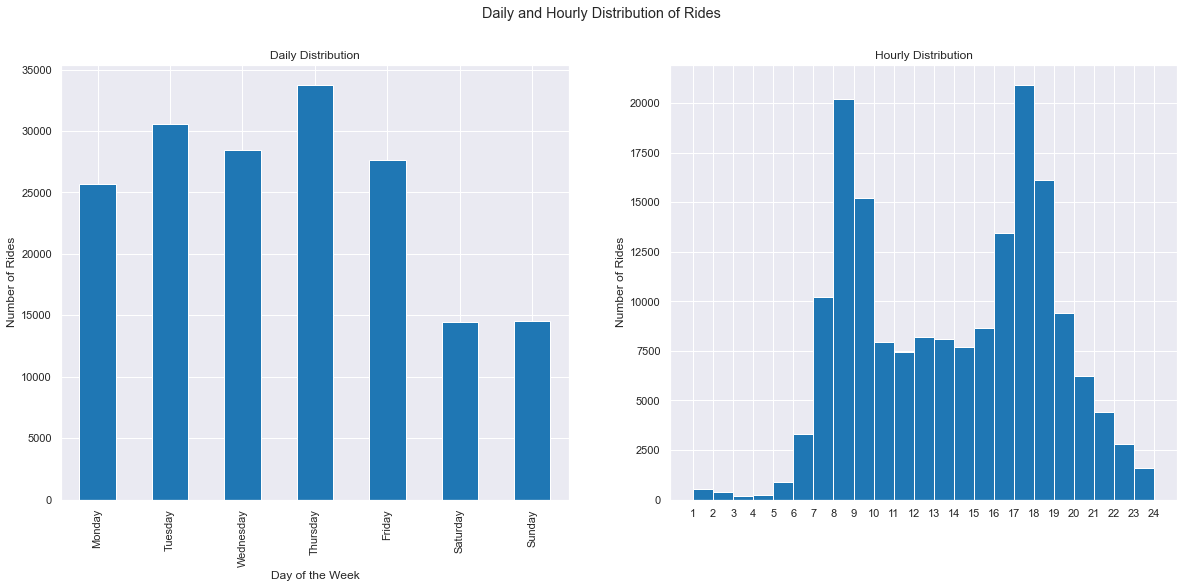

In [5]:
days_of_the_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bins = [x for x in range(1, 25, 1)]

sb.set()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 8))


plt.title("Daily Distribution")
ax1.figsize = (10, 6)
new_data.groupby(["start_weekday"]).size().reindex(days_of_the_week).plot(kind = "bar", ax = ax1, xlabel = "Day of the Week",
                                                                         ylabel = "Number of Rides",
                                                                         title = "Daily Distribution", color = "tab:blue")


new_data["start_hour_of_the_day"].plot(kind = "hist", bins = bins, ax = ax2, title = "Hourly Distribution",
                                      xlabel = "Hour of the Day", color = "tab:blue")
plt.xticks(np.arange(min(bins), max(bins)+1, 1.0));
plt.ylabel ("Number of Rides")


plt.suptitle("Daily and Hourly Distribution of Rides");

- The hourly distribution of rides for each day shows us the general trend observed before (i.e. that two peaks riding periods exist at 8-9am and 5-6pm) and that the hourly distribution of rides during the weekend changed.

- The hourly distribution on weekends shows only one peak which extends from around 1pm to around 4pm. 

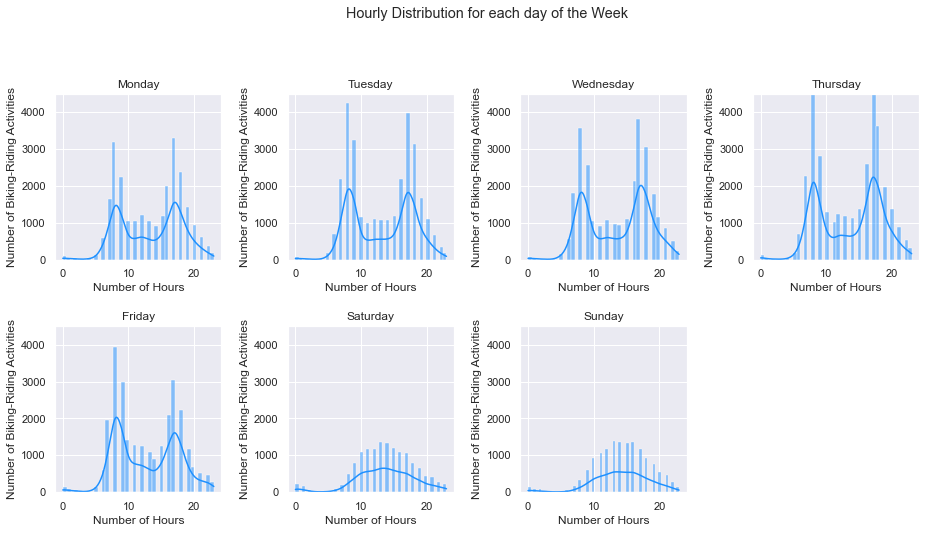

In [6]:
plt.figure(figsize = (15, 15))
plt.xlim(0, 25)

for i, day_name in enumerate(days_of_the_week):
    plt.subplot(4,4, i+1)
    plt.ylim(0, 4500)
    day_data = new_data[new_data["start_weekday"].isin([day_name])]
    sb.histplot(data = day_data, x = "start_hour_of_the_day", kde = True, shrink = 1, color = "dodgerblue")
    plt.title(day_name)
    plt.xlabel("Number of Hours")
    plt.ylabel("Number of Biking-Riding Activities")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
#plt.subplots(sharey = True)

plt.suptitle("Hourly Distribution for each day of the Week");

## (Visualization 3)



- The most busy bike station.

- The most busy route taken by bikers.

In [7]:
station_takeoffs = new_data.groupby("start_station_name").size().reset_index(name = "number_of_trips")

station_arrivals = new_data.groupby("end_station_name").size().reset_index(name = "number_of_trips")

#Making copies of the dataframes
station_takeoffs_cp = station_takeoffs.copy()
station_arrivals_cp = station_arrivals.copy()

#Creating "takeoffs and arrivals" column so that we can have columns for takeoffs and arrivals
station_takeoffs_cp["takeoffs_and_arrivals"] = "takeoff"
station_arrivals_cp["takeoffs_and_arrivals"] = "arrival"

#Creating a common station name called "station_name" for both dataframes
station_takeoffs_cp["station_name"] = station_takeoffs_cp["start_station_name"]
station_arrivals_cp["station_name"] = station_arrivals_cp["end_station_name"]

#Drop the original station name columns; "start_station_name" and "end_station_name"
station_takeoffs_cp.drop(["start_station_name"], axis = 1, inplace = True)
station_arrivals_cp.drop(["end_station_name"], axis = 1, inplace = True)

#Since we are only interested in the top 11 takeoffs and arrivals, we concatenate just the top 11 "number_of_trips" values from both dataframes
trips = pd.concat([station_arrivals_cp, station_takeoffs_cp])

top_trips = trips[trips["station_name"].isin(trips.nlargest(30, "number_of_trips")["station_name"])]

In [8]:
def make_clustered_hbar_chart(dataframe_object, x_vals, y_vals, hue_column, xlabel, ylabel, title, palette = None):
    """
    The function helps us to create a clustered horizontal bar chart. The parameters it takes are given below:
    1. dataframe_object: This is the dataframe object that holds the data to be plotted.
    2. x_vals: This refers to the values we want on the x-axis. (Usually numbers)
    3. y_vals: This refers to the values we want on the y-axis. (Usually strings)
    4. hue_column: This is the column from our dataframe object that determines the color of the bars of the bar chart.
    5. xlabel: This refers to the name of the entire x-axis.
    6. ylabel: This refers to the name of the entire y-axis.
    7. title: This refers to the name of the entire chart
    
    """
    plt.figure(figsize = (8, 10))
    sb.set_palette(palette)
    ax1 = sb.barplot(x = x_vals, y = y_vals, hue = hue_column, data = dataframe_object, orient= "h")
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(p.get_width(), p.get_y()+0.5*p.get_height(),
                 '{:,}'.format(width),
                 ha='left', va='center')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks([]);

- In the chart given, we have the stations that have the most amount of arrivals and takeoffs and the San Francisco Caltrain Station 2 is the most busy bike station 

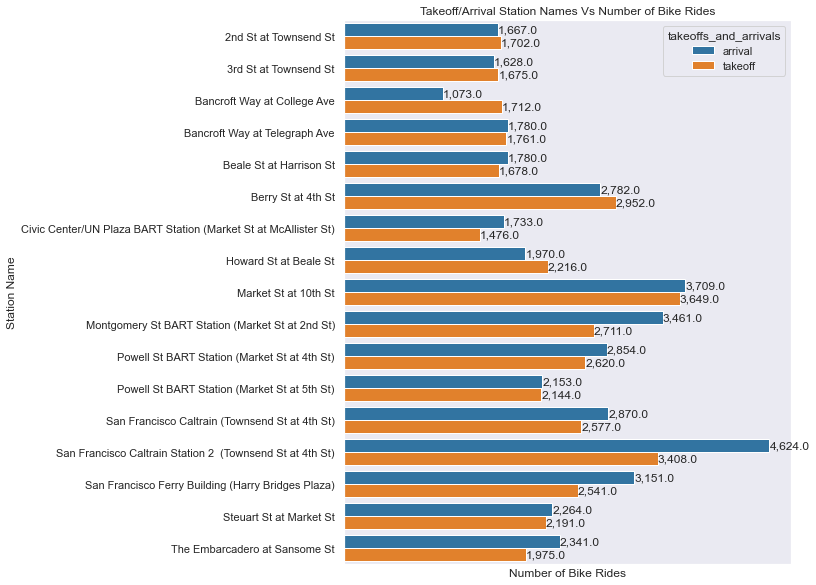

In [9]:
make_clustered_hbar_chart(top_trips, "number_of_trips", "station_name", "takeoffs_and_arrivals", "Number of Bike Rides",
                         "Station Name", "Takeoff/Arrival Station Names Vs Number of Bike Rides", "tab10")

- The most busy route: Berry St. at 4th St. to San Francisco Ferry Building (Harry Bridges Plaza)

In [10]:
new_data["route"] = new_data["start_station_name"] + " → " + new_data["end_station_name"]

new_data["takeoff_destination_set"] = new_data["route"].apply(lambda x: tuple(sorted(set(x.split(" → ")))))
common_routes = new_data.groupby(["takeoff_destination_set", "route"]).size().reset_index(name = "number_of_rides")

j = common_routes["takeoff_destination_set"] != common_routes["takeoff_destination_set"].shift()
common_routes["route_direction"] = j.apply(lambda x: "forward →" if (x) else "backward ←")

mapping = new_data.groupby(["takeoff_destination_set"]).size().reset_index(name = "total_number_of_rides")
common_routes = pd.merge(common_routes, mapping, on = "takeoff_destination_set")

#Top_return_journeys helps us to find the top 30 routes by number of rides
top_return_journeys = common_routes[common_routes["takeoff_destination_set"].isin(common_routes.nlargest(30, "total_number_of_rides")["takeoff_destination_set"])].copy()

top_return_journeys["reference_direction"] = np.NaN

top_return_journeys["reference_direction"] = np.where(top_return_journeys["route_direction"] == "forward →", top_return_journeys["route"].values, top_return_journeys["reference_direction"])

top_return_journeys["reference_direction"] = top_return_journeys["reference_direction"].ffill(axis = 0)

top_return_journeys["reference_direction"] = top_return_journeys["reference_direction"].str.replace("→", "↔")


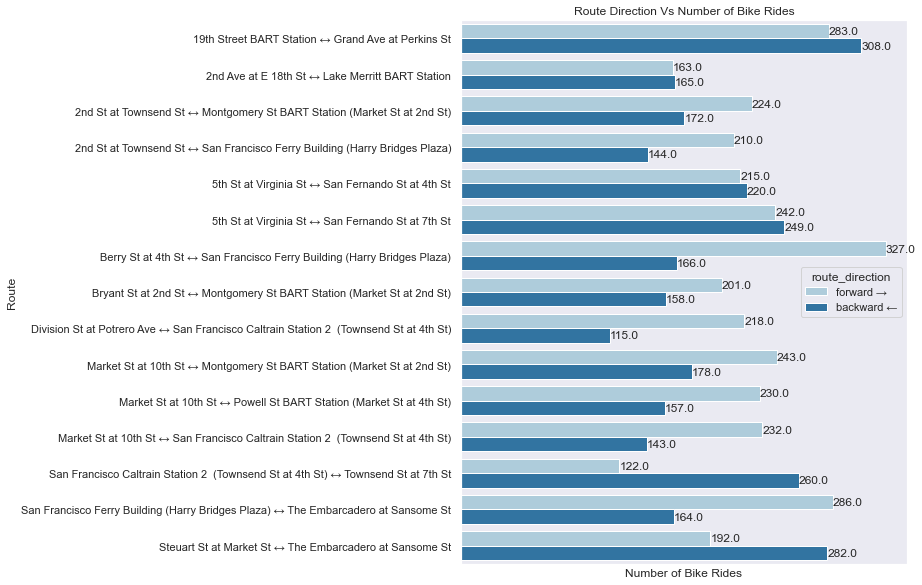

In [11]:
make_clustered_hbar_chart(top_return_journeys, "number_of_rides", "reference_direction", "route_direction", "Number of Bike Rides",
                         "Route", "Route Direction Vs Number of Bike Rides", "Paired")

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [12]:
!jupyter nbconvert Part_II_FilenamePart_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Part_II_FilenamePart_II_slide_deck_template.ipynb' matched no files



formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
    Equivalent to: [--ExecutePreprocessor.allow_errors=True]
--stdin
    re

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 